In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the ticker for Ethereum
eth_ticker = yf.Ticker("ETH-USD")

# Check if the CSV file already exists
if os.path.exists("eth.csv"):
    eth = pd.read_csv("eth.csv", index_col=0)
else:
    eth = eth_ticker.history(period="max")
    eth.to_csv("eth.csv")

<Axes: xlabel='Date'>

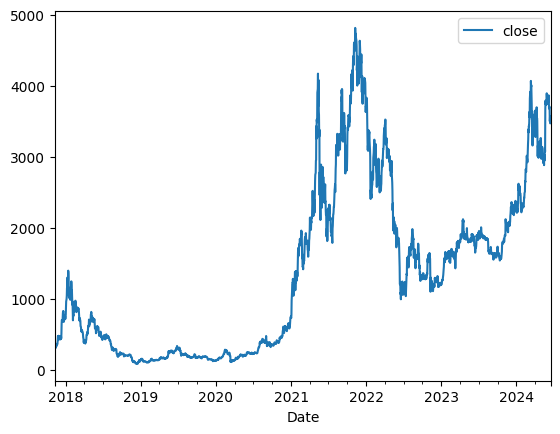

In [3]:
# Convert index to datetime
eth.index = pd.to_datetime(eth.index)

# Remove unnecessary columns
del eth["Dividends"]
del eth["Stock Splits"]

# Convert column names to lowercase
eth.columns = [c.lower() for c in eth.columns]

# Plot the closing price
eth.plot.line(y="close", use_index=True)

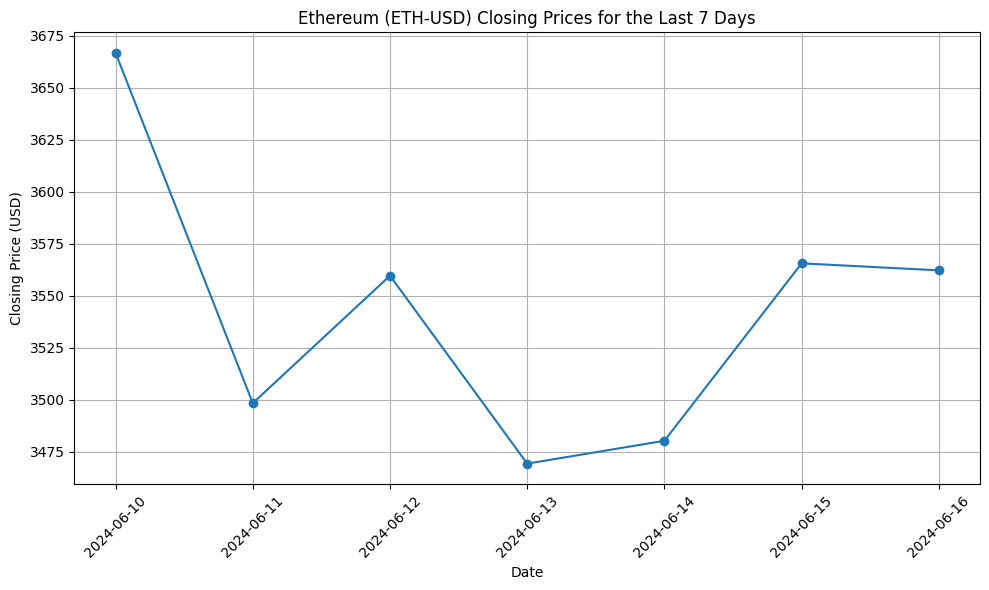

In [4]:
# Filter the data for the last seven days
last_seven_days_eth = eth[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_eth.index, last_seven_days_eth['close'], marker='o')
plt.title('Ethereum (ETH-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("ethereum_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2014-09-08,3.633333,0.219135,0.355397
2014-09-30,3.633333,0.285044,0.322063
2014-10-08,3.666667,0.347025,0.288730
2014-10-14,3.566667,0.320337,0.305397
2014-10-23,2.900000,0.298716,0.319286
...,...,...,...
2024-05-26,1.700000,-0.234965,0.606111
2024-05-27,1.666667,-0.265106,0.622778
2024-05-30,1.666667,-0.256724,0.622778
2024-06-05,1.666667,-0.265066,0.622778


In [6]:
# Assuming 'eth' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
eth = eth.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
eth["tomorrow"] = eth["close"].shift(-1)
eth["target"] = (eth["tomorrow"] > eth["close"]).astype(int)
eth["target"].value_counts()


target
1    361
0    331
Name: count, dtype: int64

In [7]:
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,2.566667,-0.297346,0.636111,299.252991,0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,2.600000,-0.297761,0.636111,316.716003,1
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,2.666667,-0.325542,0.652778,337.631012,1
2017-11-14 00:00:00+00:00,316.763000,340.177002,316.763000,337.631012,1069680000,2.700000,-0.326967,0.652778,332.394012,0
2017-11-17 00:00:00+00:00,330.166992,334.963989,327.523010,332.394012,621732992,2.700000,-0.352462,0.669444,347.612000,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-26 00:00:00+00:00,3749.179932,3879.470703,3732.022949,3825.897461,14650794791,1.700000,-0.234965,0.606111,3892.006836,1
2024-05-27 00:00:00+00:00,3826.127197,3973.556396,3821.930420,3892.006836,18949181813,1.666667,-0.265106,0.622778,3746.849609,0
2024-05-30 00:00:00+00:00,3763.357666,3823.643311,3702.263672,3746.849609,15065849797,1.666667,-0.256724,0.622778,3864.260986,1
2024-06-05 00:00:00+00:00,3812.560791,3887.485840,3778.655762,3864.260986,15480034434,1.666667,-0.265066,0.622778,3678.629150,0


In [8]:
eth.to_csv('ethSentimet.csv')